In [1]:
from yelp_functions import get_restaurant_vectors
import pandas as pd

# import the data with vectors for restaurants
ids, embeddings, price_range = get_restaurant_vectors()

# create dataframe from lists
restaurants = {'business_id': ids, 'price_range': price_range, 'vector': embeddings}
restaurants = pd.DataFrame(data=restaurants)

# reduce the dataset to 150 reviews of each category
restaurants = restaurants.groupby('price_range').apply(lambda x: x.sample(150, random_state=0).reset_index(drop=True))
restaurants = restaurants.droplevel(level=0)

# check new dataframe
restaurants.groupby('price_range').count()

,business_id,vector
price_range,,
1,150,150
2,150,150
3,150,150
4,150,150


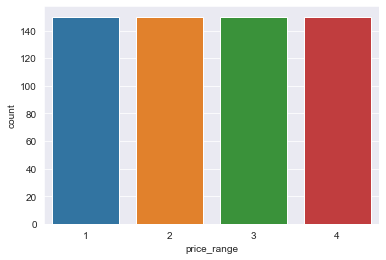

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# check distribution of the data
sns.countplot(x='price_range', data=restaurants)
plt.show()

In [3]:
restaurants

,business_id,price_range,vector
0,FEXhWNCMkv22qG04E83Qjg,1,"[0.0002521815588297661, 0.0017086522603582427,..."
1,9_DJMSzn5PtMit78KFrwaw,1,"[0.005847953216374265, 0.0023148148148148134, ..."
2,-8B29WNRCyg4jViK4ChKlQ,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,sNqvMmAu2c-F36ivlusx-w,1,"[0.0037872026553568104, 0.00597092496517327, 0..."
4,1nAIflbdv4Zlqwj7_u3icQ,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...
145,fEqiXG_B-fn__w0aeF3nBQ,4,"[0.0002560071937581982, 0.0011684197614080978,..."
146,rnjXf1zDn9LGejhIX1tqxA,4,"[0.0, 0.004318117779656228, 0.0, 0.0, 0.0, 0.0..."
147,4KH6DlFi25Fx1-hlSF7ViA,4,"[0.0005470424613167865, 0.0014649922095914141,..."
148,9PXJkRLVWd6IMPfBzdJp2Q,4,"[0.0008857770455270628, 0.0015389593672964078,..."


In [18]:
from sklearn.model_selection import train_test_split
import numpy as np

X, y = np.array(restaurants['vector'].tolist()), np.array(restaurants['price_range'].tolist())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# using KNNs for classification
knn = KNeighborsClassifier(n_neighbors=20).fit(X_train, y_train)
print("KNN test score:", knn.score(X_test, y_test))
print("KNN train score:", knn.score(X_train, y_train))

# using SVMs for classification
svm = SVC().fit(X_train, y_train)
print("SVM test score:", svm.score(X_test, y_test))
print("SVM train score:", svm.score(X_train, y_train))

# using random forests for classification
rfc = RandomForestClassifier(max_depth=5, random_state=0).fit(X_train, y_train)
print("RF test score:", rfc.score(X_test, y_test))
print("RF train score:", rfc.score(X_train, y_train))

# using logistic regression for classification
lrc = LogisticRegression(random_state=0).fit(X_train, y_train)
print("LR test score:", lrc.score(X_test, y_test))
print("LR train score:", lrc.score(X_train, y_train))

# using logistic regression for classification
nbc = MultinomialNB().fit(X_train, y_train)
print("NB test score:", nbc.score(X_test, y_test))
print("NB train score:", nbc.score(X_train, y_train))

KNN test score: 0.47333333333333333
KNN train score: 0.43777777777777777
SVM test score: 0.6933333333333334
SVM train score: 0.8977777777777778
RF test score: 0.6666666666666666
RF train score: 0.8577777777777778
LR test score: 0.38666666666666666
LR train score: 0.4222222222222222
NB test score: 0.23333333333333334
NB train score: 0.28888888888888886


In [38]:
from sklearn.decomposition import PCA

# apply principal component analysis
pca = PCA(n_components=64).fit(X_train)
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

# check the results form transform
X_train.shape, X_train_reduced.shape

((450, 4096), (450, 64))

In [43]:
# using KNNs for classification
knn = KNeighborsClassifier(n_neighbors=20).fit(X_train_reduced, y_train)
print("KNN test score:", knn.score(X_test_reduced, y_test))
print("KNN train score:", knn.score(X_train_reduced, y_train))

# using SVMs for classification
svm = SVC().fit(X_train_reduced, y_train)
print("SVM test score:", svm.score(X_test_reduced, y_test))
print("SVM train score:", svm.score(X_train_reduced, y_train))

# using random forests for classification
rfc = RandomForestClassifier(max_depth=4, random_state=0).fit(X_train_reduced, y_train)
print("RF test score:", rfc.score(X_test_reduced, y_test))
print("RF train score:", rfc.score(X_train_reduced, y_train))

# using logistic regression for classification
lrc = LogisticRegression(random_state=0).fit(X_train_reduced, y_train)
print("LR test score:", lrc.score(X_test_reduced, y_test))
print("LR train score:", lrc.score(X_train_reduced, y_train))

KNN test score: 0.5866666666666667
KNN train score: 0.5777777777777777
SVM test score: 0.6933333333333334
SVM train score: 0.8288888888888889
RF test score: 0.62
RF train score: 0.8422222222222222
LR test score: 0.38666666666666666
LR train score: 0.4111111111111111


In [52]:
from sklearn.svm import SVR

# train the price score model
price_score_model = SVR(C=0.6).fit(X_train_reduced, y_train)
print("SVM test score:", price_score_model.score(X_test_reduced, y_test))
print("SVM train score:", price_score_model.score(X_train_reduced, y_train))

SVM test score: 0.649206560169296
SVM train score: 0.7453413206413427


In [56]:
# create dataframe from lists
restaurants = {'business_id': ids, 'price_range': price_range, 'vector': embeddings}
restaurants = pd.DataFrame(data=restaurants)

# determine the price score
X, y = np.array(restaurants['vector'].tolist()), np.array(restaurants['price_range'].tolist())
X = pca.transform(X)
price_score = price_score_model.predict(X)

# check results
price_score

array([1.58228019, 2.0072507 , 1.55103358, ..., 0.863155  , 2.46550353,
       1.68259716])

In [57]:
# add new column to dataframe and check results
restaurants['price_score'] = price_score
restaurants

,business_id,price_range,vector,price_score
0,--0iUa4sNDFiZFrAdIWhZQ,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.582280
1,--7PUidqRWpRSpXebiyxTg,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2.007251
2,--8IbOsAAxjKRoYsBFL-PA,2,"[0.0013227513227513205, 0.002111577332114547, ...",1.551034
3,--ZVrH2X2QXBFdCilbirsw,1,"[0.0008680555555555547, 0.0, 0.0, 0.0, 0.0, 0....",1.936654
4,--epgcb7xHGuJ-4PUeSLAw,1,"[0.00033578918560769633, 0.0019058061821219654...",1.332932
...,...,...,...,...
44479,zziDpuuJw-Km1J4BaGpBKA,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.562627
44480,zzjFdJwXuxBOGe9JeY_EMw,1,"[0.0, 0.002504383826144342, 0.0, 0.0, 0.0, 0.0...",1.535871
44481,zznJox6-nmXlGYNWgTDwQQ,1,"[0.00574712643678159, 0.0012345679012345635, 0...",0.863155
44482,zzu6_r3DxBJuXcjnOYVdTw,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2.465504


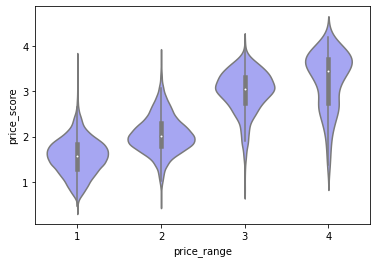

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# create scatter plot to visualize price range and price score
sns.violinplot(data=restaurants, x='price_range', y='price_score', color=[0.6, 0.6, 1])
plt.savefig('figures/price_range_vs_score.png', dpi=250)
plt.show()

In [70]:
import pickle

# save data and models
restaurants.to_csv('processed_data/restaurants_price_score.csv', index=False)
pickle.dump(price_score_model, open('models/price_score_model.sav', 'wb'))
pickle.dump(pca, open('models/price_score_pca.sav', 'wb'))